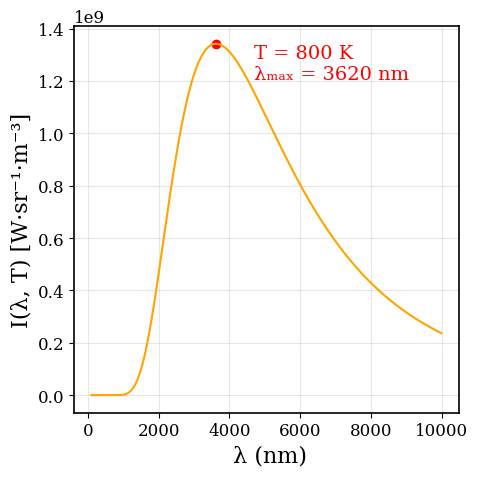

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Define physical constants (SI units)
h = 6.62607015e-34      # Planck constant (J·s)
c = 2.99792458e8        # Speed of light in vacuum (m/s)
kB = 1.380649e-23       # Boltzmann constant (J/K)

# CMS style
plt.rcParams.update({
    "font.size": 14,
    "font.family": "serif",
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "grid.alpha": 0.3,
})
#
def I(λ, T):
    """
    Blackbody spectral radiance as a function of wavelength and temperature.
    in W·sr⁻¹·m⁻³
    (power per unit area per unit solid angle per unit wavelength)
    """
    numerator = 2 * h * c**2
    denominator = (λ**5) * (np.exp(h * c / (λ * kB * T)) - 1)
    return numerator / denominator

# --- Parameters ---
T = 800  # temperature in K
λs = np.arange(1e-7, 10e-6, 1e-8)  # wavelength range (m)


# --- Compute intensity ---
I_vals = I(λs, T)

# --- Find peak ---
peak_index = np.argmax(I_vals)
peak_lambda = λs[peak_index]
peak_I = I_vals[peak_index]

# --- Plot ---
plt.figure(figsize=(5,5))
plt.plot(λs * 1e9, I_vals, color='orange')  # convert λ to nm for clarity

# --- Labels and title ---
plt.xlabel(" λ (nm)")
plt.ylabel("I(λ, T) [W·sr⁻¹·m⁻³]")
# plt.title(f"Blackbody Spectrum at T = {T} K")

# --- Mark the peak ---
plt.scatter(peak_lambda * 1e9, peak_I, color='red')
plt.text(1.3*peak_lambda * 1e9, peak_I * .90,
         f"T = {T} K\nλₘₐₓ = {peak_lambda*1e9:.0f} nm",
         color='red', ha='left', )

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("planck.pdf")

plt.show()